# Estimação por intervalos


Um intervalo de confiança fornece um intervalo estimado de valores que provavelmente inclui um parâmetro populacional desconhecido, sendo o intervalo estimado calculado a partir de um determinado conjunto de dados de amostra.

A principal restrição da estimação pontual é que quando estimamos um parâmetro através de um único valor numérico toda a informaçãao presente nos dados é resumida através deste número. Nesse sentido, é importante encontrar também um intervalo de valores plausíveis para o parâmetro.
A idéia é construir um intervalo em torno da estimativa pontual de modo que ele tenha uma probabilidade conhecida de conter o verdadeiro valor do parâmetro.

Suponha que $X_1, X_2, \cdots, X_n$ seja uma amostra aleatória proveniente de uma distribuição normal, com média desconhecida $\mu$ e variância conhecida $\sigma^2$.

Para fazermos inferências sobre $\mu$ nos baseamos na média amostral $\bar{X}$.

Sabemos também que $\bar{X}$ é normalmente distribuída, com média $\mu$ e variância $\frac{\sigma^2}{n}$.

Assim:

$$ Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \quad \mbox{ou} \quad Z =  \frac{\sqrt{n} (\bar{X} - \mu)}{\sigma} $$



Note que $Z$ é uma função da amostra e do parâmetro $\mu$; mas sua distribuição de probabilidades não depende de $\mu$.

Usando uma tabela da distribuição normal padronizada podemos obter o valor do percentil $z_{\alpha/2}$ tal que:

$$ \mathbb{P}\left(-z_{\alpha/2}\leq Z \leq z_{\alpha/2}\right) = 1 - \alpha $$

Na desigualdade podemos colocar $\mu$ em evidência de forma que:

$$ \mathbb{P}\left(\bar{X}-z_{\alpha/2}\frac{\sigma}{\sqrt{n}}\leq \mu\leq \bar{X}+z_{\alpha/2}\frac{\sigma}{\sqrt{n}}\right) = 1 - \alpha $$


Na inferência estatística clássica, o parâmetro $\mu$ é desconhecido, mas é fixo, não sendo passível de uma descrição probabilística. Os limites do intervalo de confiança é que constituiem variáveis aleatórias.

In [1]:
# Carregar bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as stats

#### Vamos simular a distribuição de uma variável aleatória $X$ normalmente distribuida com média $\mu = 80$ e variância $\sigma^2 = 100$.

In [4]:
# Estabelecer uma semente aleatória
np.random.seed(123)

# Simular distribuição da variaável aleatória X com 10.000 observações
X = np.random.normal(80, 10, 10000)

In [5]:
# Média populacional
media = np.mean(X)
media

80.09711892291595

In [16]:
# Desvio-padrão populacional
std = np.std(X)
std

9.981138545901475

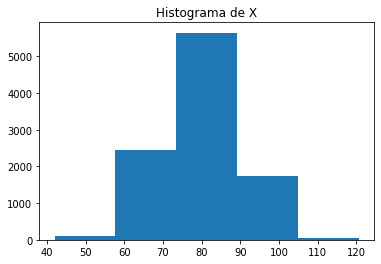

In [7]:
# Histograma
plt.hist(X, bins = 5) 
plt.title("Histograma de X") 
plt.show()

Agora consideramos uma amostra de 25 observações de $X$.

In [8]:
# semente aleatória
np.random.seed(1)

# Tamanho da amostra
n = 25

# "Escolha" da amostra
xs = np.random.choice(X, n)
xs

array([75.6583348 , 84.21126783, 78.8306826 , 73.26480367, 71.03281662,
       64.8803643 , 85.56548705, 78.56276107, 66.62410141, 99.40783034,
       77.08676343, 87.32800466, 65.57569395, 67.41694449, 85.31148913,
       78.87060349, 74.77105868, 80.26735374, 62.34128385, 66.72820287,
       65.27022391, 76.92227233, 71.65114263, 73.16774057, 96.25958232])

In [9]:
# Média amostral
media_xs = xs.mean()
media_xs

76.28027238878799

O fato de a variável aleatória ter distribuição conhecida, independente do parâmetro a ser estiamdo ($\mu$), permite calcular a probabilidade de $Z$ assumir um valor compreendido entre dois quaisquer números reais.

Com $\alpha = 0.5$ 
e $(1- \alpha) = 0.95$

\begin{align}
P(-1.96 < Z < 1.96) = \Phi(1.96) - \Phi(-1.96) = 2 \cdot \Phi(1.96) - 1 = 0.95
\end{align}


#### Obtendo o valor de Z crítico ($z_c$)

No caso de uma distribuição normal, para obter valores de $z$ crítico vamos usar o método [`norm.ppf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) do [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html).

In [10]:
# Importar scipy.stats
from scipy.stats import norm

Inicialmente, vamos considerar situações unicaudais.

Com $\alpha = 0.5$, o valor de $z_c$ na cauda esquerda é:

In [11]:
norm.ppf(.05)

-1.6448536269514729

 O valor de $z_c$ na cauda direita é:

In [12]:
norm.ppf(1 - .05)

1.6448536269514722

Considerando a mensuração de probabilidade em duas caudas, com $\alpha = 0.5$, o valor de $z_c$ é:

In [13]:
norm.ppf(1-.05 / 2)

1.959963984540054

#### Voltando ao exemplo

Considerando o exemplo em que a variância é $\sigma^2 = 100$, $n=25$.

A variância de $\bar{X}$ é: 

$$\sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}} = \frac{100}{5} = 20$$

Estabelecendo um nível de significância de $\alpha = 0,05$ (bicaudal) temos:


In [17]:
# Nível de significância
alfa = 0.05
alfa2 = alfa / 2

# Coeficiente de Confiança
cconf = 1 - alfa

# Erro padrão da média amostral
stdx = std / np.sqrt(n)

# Valor de z-crítico
zc = norm.ppf(1- alfa2)

# Imprimir
print("Nível de significância = ", alfa)
print("Coeficiente de confiança = ", cconf)
print("Erro padrão da média amostral = ", round(stdx, 4))
print("Z - crítico = ", round(zc, 4))

Nível de significância =  0.05
Coeficiente de confiança =  0.95
Erro padrão da média amostral =  1.9962
Z - crítico =  1.96


In [19]:
# Intervalo de confiança
# Limite inferior
lim_inf = media_xs - (zc * stdx)
#Limite superior
lim_sup = media_xs + (zc * stdx)

# Imprimir
print('Limite inferior: {:.4f}'.format(lim_inf))
print('Limite superior: {:.4f}'.format(lim_sup))

Limite inferior: 72.3677
Limite superior: 80.1928


Temos então:

$$ \mathbb{P} \left( \bar{X} - z_{\alpha/2}\frac{\sigma}{\sqrt{n}} \leq \mu \leq \bar{X} + z_{\alpha/2}\frac{\sigma}{\sqrt{n}} \right) = 1 - \alpha $$
 
$$ \mathbb{P} \left[ 76,28 - 1,96 (1,9962) \leq \mu \leq 76,28 - 1,96 (1,9962) \right] = 0,95 $$

$$ \mathbb{P} \left[ 72,3677 \leq \mu \leq 80,1928 \right] = 0,95 $$

O intervalo de confiança é:

$$ \mathrm{CI}_{0.95}(\mu)=\left[ 72,3677 ; \quad 80,1928 \right] $$


**Interpretando um intervalo de confianaça**

Como alguém interpreta um intervalo de confiança? No Exemplo anterior, o IC de 95% para $\mu$ é [72,3677 ; 80,1928]. Dada a forma de contrução destes limites para o IC, somos tentados a interpretar da seguinte forma: $\mu$ está dentro desse intervalo com 95% de probabilidade. Entretanto, com uma pequena reflexão, é fácil ver que isso não está correto. Apesar de desconhecido, o verdadeiro valor de $\mu$ é fixo. Após estabelcer um intervalo de confiança, ele deve estar ou não neste intervalo. A interpretação correta está em compreender que um IC é um intervalo aleatório, considerendao que na afirmação de probabilidade definindo os extremos do intervalo, os limites inferior e superior são variáveis aleatórias.

A interpretação correta de um IC $100(1 – \alpha)$% depende da visão de frequência relativa da probabilidade. Se temos uma quantidade grande de amostras aleatórias e intervalos de confiança $100(1 – \alpha)$%  para $\mu$ são calculado a partir de cada amostra, $100(1 – \alpha)$% desses intervalos conterão o valor verdadeiro de $\mu$.

Essa situação é abordada no exemplo a seguir, que constroi intervalos de confiança para várias amostras.

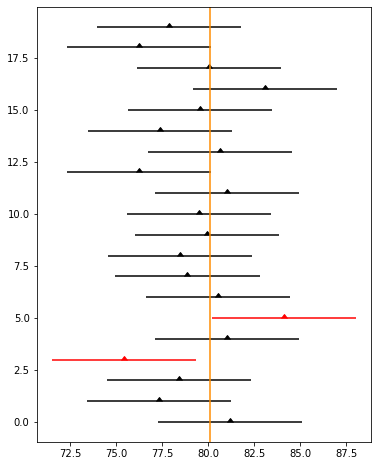

18/20=0.9


In [20]:
# semente aleatória
np.random.seed(321)

# Nível de significância
alfa = 0.05
alfa2 = alfa / 2
# Coeficiente de Confiança
cconf = 1 - alfa
# Erro padrão da média amostral
stdx = std / np.sqrt(n)
# Valor de z-crítico
zc = stats.norm.ppf(1- alfa2)
# Número de amostras
amostras = 20
# Tamanho de cada amostra
n = 25

# Criar um vetor vazio para "guardar" médias amostrais para cada amostra
media_amostras = []

# laço for para estimar médias amostrais
for i in range(amostras):
    xs = np.random.choice(X, n)
    media_xs = xs.mean()
    media_amostras.append(media_xs)    
    
# Definir um índice para os intervalos (amostras)
j=0

# Base do gráfico
_, ax = plt.subplots(1, 1, figsize=(6, 8))

# laço for para comparar intervalos de confiança com valor da média de X
for i in range(len(media_amostras)):
    if (media > media_amostras[i] - (zc * stdx)) & (media < media_amostras[i] + (zc * stdx)):
        # se o intervalo contêm a média de X
        ax.errorbar(media_amostras[i], np.arange(len(media_amostras))[i], lolims=True, xerr=(zc * stdx), yerr=0.0, linestyle='', c='black')
        j +=1
    else:
        # se o intervalo não contêm a média de X
        ax.errorbar(media_amostras[i], np.arange(len(media_amostras))[i], lolims=True, xerr=(zc * stdx), yerr=0.0, linestyle='', c='red')

ax.axvline(media, color='darkorange')
plt.show()
print(f'{j}/{amostras}={np.round(j/amostras,2)}')

Perceba que 2 dos 20 IC estimados não possuem o verdadeiro valor de $\mu$.

Em situações práticas, geralmente obtemos somente uma amostra aleatória e calculamos um IC. Uma vez que esse intervalo poderá conter ou não o valor verdadeiro de $\mu$, não é razoável vincular um nível de probabilidade a esse evento específico. A afirmação apropriada é que o intervalo observado envolve o valor verdadeiro de $\mu$, com confiança de $100(1 – \alpha)$%. Essa afirmação tem uma interpretação frequentista; isto é, não sabemos se a afirmação é verdadeira para essa amostra específica, mas o método usado para obter o intervalo resulta em afirmações corretas $100(1 – \alpha)$% das vezes.

Vejamos uma definição mais formal para Intervalo de Confiança.

> **Definição**

Seja $ X_1, X_2, \cdots, X_n $ uma amostra aleatória de uma população com função de densidade dada por $f(x | \theta)$, com $ \theta \in \Theta $. Considera-se duas estatísticas:

$$ T_1 = T_1 \left( X_1, X_2, \cdots, X_n  \right) $$

$$ T_2 = T_2 \left( X_1, X_2, \cdots, X_n  \right) $$

de forma que $ T_1 < T_2$, tais que:

$$ P \left( T_1 < \theta < T_2  \right) = 1 - \alpha, \quad \forall \theta \in \Theta, \quad (0 < \alpha < 1) $$


$ \alpha $ não depende de $\theta $. Um intervalo aleatório para $\theta$ é um intervalo $\left( T_1, T_2 \right)$, na condições acima.

Quando se dispõe de uma amostra particular $\left( x_1, x_2, \cdots, x_n  \right)$, sejam:
$$ t_1 = T_1 \left( x_1, x_2, \cdots, x_n  \right) $$

$$ t_2 = T_2 \left( x_1, x_2, \cdots, x_n  \right) $$

os valores assumidos pelas estatísticas $t_1$ e $t_2$, respectivamente.





## Intervalo de Confiança para a média $\mu$ com variância $\sigma^2$ conhecida

Suponha que queiramos estimar a média $\mu$ de uma população com distribuição normal com variância $\sigma^2$ conhecida.

O estimador de máxima verossimilhança para a média populacional $\mu$ é dado pela média amostral $\bar{X}$ de uma amostra de tamanho $n$. Assim, temos a seguinte quantidade pivotal:

$$ Z = \frac{\bar{X}-\mu}{\sigma/\sqrt{n}} \sim N(0,1) $$

O intervalo de confiança assume a forma:

$$ P(-z_{(\alpha/2)} \leq Z \leq z_{(\alpha/2)} )=1-\alpha $$

O valor $z_{(α/2)}$ pode ser obtido de uma distribuição Normal Padrão, $N(0,1)$.

Com isso, o intervalo de confiança para a média populacional com variância conhecida é dado por:

$$ IC(\mu;1-\alpha) = \left(\bar{X} - z_{(\alpha/2)}\sigma/\sqrt{n}; \quad \bar{X} + z_{(\alpha/2)}\sigma/\sqrt{n}\right) $$

Chamamos $\varepsilon = z_{(\alpha/2)} \frac{\sigma}{\sqrt{n}}$ de erro amostral.

### Grandes amostras
Seja $X_1, X_2, \cdots, X_n$ uma amostra aleatória proveniente de uma população com média $\mu$ e variância $\sigma^2$ desconhecidas. 

Se o tamanho da amostra $n$ for grande, o teorema central do limite implica que a variável padronizada $Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}}$ tem uma distribuição aproximadamente normal com média $\mu$ e variância $\frac{\sigma^2}{n}$. Logo, $Z$ tem aproximadamente uma distribuição normal padrão. 
Essa razão poderia ser usada como um pivotal para produzir um IC aproximado para $\mu$. Mesmo quando o desvio-padrão $\sigma$ é desconhecido, quando $n$ é grande; a troca de $\sigma$ pelo desvio-padrão $S$ da amostra tem pouco efeito na distribuição de $Z$.


### Exemplo

Considere uma amostra de 100 observações com média $\bar{x}=30$ e $S=50$.
Considerando um nível de confiança de 95%, calcule um intervalo de confiança para a média.

In [21]:
media = 30
S = 50
n = 100
stdx = S/ np.sqrt(n)

In [22]:
cconf = .95
caudas    = 2
alpha     = (1 - cconf)/caudas
z_critico = stats.norm.ppf(1 - alpha)

# Intervalo de confiança
lim_inf = media - (z_critico * stdx)
lim_sup = media + (z_critico * stdx)

#  IMprimir intervalos
print('Coeficiente de confiança: {:.0%}'.format(cconf))
print('Nível de significância: {:.4f}'.format(alpha))
print('Valor de z-critico: {:.4f}'.format(z_critico))
print('\nIntervalo de confiança:\nLimite inferior: {:.4f}'.format(lim_inf))
print('Limite superior: {:.4f}'.format(lim_sup))

Coeficiente de confiança: 95%
Nível de significância: 0.0250
Valor de z-critico: 1.9600

Intervalo de confiança:
Limite inferior: 20.2002
Limite superior: 39.7998


Podemos usar o método [`norm.interval`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html).

In [23]:
norm.interval(alpha = cconf, loc = media, scale = stdx)

(20.20018007729973, 39.799819922700266)

## Intervalo de Confiança para a média $\mu$ com variância $\sigma^2$ desconhecida

Consideremos uma amostra aleatória simples $X_1, X_2, \dots ,X_n$, obtida de uma população com distribuição normal, com média $\mu$ e variância $\sigma^2$ desconhecidas.

Como neste caso a variância é desconhecida, utilizaremos a variância amostral $S^2$ no lugar de $\sigma^2$. Assim, temos que:

$$ T = \frac{\bar{X}-\mu}{S/\sqrt{n}} \sim t_{(n-1)} $$


A variável $T$ tem distribuição **t de Student** com $n−1$ graus de liberdade.

Queremos construir um intervalo de confiança da forma:

$$ IC(\mu;1-\alpha) = \left(\bar{X} - t_{(n-1;\alpha/2)}S/\sqrt{n}; \quad \bar{X} + t_{(n-1;\alpha/2)}S/\sqrt{n}\right) $$

Chamamos $\varepsilon = t_{(n-1;\alpha/2)} \frac{S}{\sqrt{n}}$ de erro amostral.


### Exemplo

Vamos considerar dados de uma amostra "pseudo-fictícia" do rendimento médio, em quilos/hectare, da produção de milho de 25 fazendas.
Os dados estão armazenados em um arquivo do MS Excel e devem ser lidos com o método `read_excel`.

In [25]:
# Caso esteja executando este notebook no Colab deve-se executar
from google.colab import files
arquivo = files.upload()

Saving prod_media.xlsx to prod_media.xlsx


In [27]:
dados = pd.read_excel('prod_media.xlsx')
dados.head(25)

,fazenda,regiao,rend_kha
0,F1,REG1,4459
1,F2,REG1,2615
2,F3,REG1,2340
3,F4,REG1,5238
4,F5,REG1,3194
5,F6,REG1,912
6,F7,REG1,4190
7,F8,REG1,4235
8,F9,REG1,4198
9,F10,REG1,812


Considerando estes dados, vamos contruir uma estimativa de intervalo para a média desta medida de produtividade das fazendas produtoras de milho.

In [28]:
# tamanho da amostra
n = dados.shape[0]
n

25

In [29]:
# média amostral
m = dados['rend_kha'].mean()
m

4462.44

In [30]:
# desvio-padrão amostral
dp = dados['rend_kha'].std()
dp

2181.335811683596

In [31]:
# desvio-padrão da média amostral
std_m = dp/ np.sqrt(n)
std_m

436.26716233671925

Para obter valores críticos de t vamos usar o método `ppf` do `scipy.stats.t`:
`ppf(q, df, loc=0, scale=1)`

In [32]:
from scipy.stats import t

# graus de liberdade
gl = n-1

# Coeficiente de confianaça considerando um intervalo bicaudal
cconf = 0.95
alpha = (1 - cconf)/2

# valor crítico
tc = t.ppf(1-alpha, gl)
print(round(tc, 4))

2.0639


In [33]:
IC = ( round(m - tc * std_m, 4), round(m + tc * std_m, 4) )
print("IC = ", IC)

IC =  (3562.0288, 5362.8512)


In [35]:
# Intervalo de confiança
lim_inf = round((m - tc * std_m), 4)
lim_sup = round((m + tc * std_m), 4)

#  IMprimir intervalos
print('Coeficiente de confiança: {:.2%}'.format(cconf))
print('Nível de significância: {:.4f}'.format(alpha*2))
print('Valor de t-critico: {:.4f}'.format(tc))
print('\nIntervalo de confiança:\nLimite inferior: {:.4f}'.format(lim_inf))
print('Limite superior:{:.4f}'.format(lim_sup))

Coeficiente de confiança: 95.00%
Nível de significância: 0.0500
Valor de t-critico: 2.0639

Intervalo de confiança:
Limite inferior: 3562.0288
Limite superior:5362.8512


Podemos usar o método [`t.interval`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html).

In [36]:
t.interval(alpha = 0.95, df = gl, loc = m, scale = std_m)

(3562.028831167707, 5362.851168832292)

## Intervalo de confiança para Proporção

Temos que:

$$ \hat{p} \sim N\left(p; \frac{p(1-p)}{n}\right) $$

Observemos que a variância de $\hat{p}$ depende do parâmetro desconhecido $p$. No entanto, pelo fato de $n$ ser grande, podemos substituir $p$ por $\hat{p}$. Com isso temos que:

$$ Z = \left(\frac{\hat{p} - p}{\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}}\right) \sim N(0,1) $$

Considerando o mesmo procedimento de montagem do intervalo para a média, construímos o intervalo com $100(1 -\alpha)\%$ de confiança para a proporção $p$:

$$ IC(p;1-\alpha) = \left(\hat{p} - z_{\alpha/2}\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}; ~~\hat{p} + z_{\alpha/2}\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}\right) $$

Neste caso o erro amostral é dada por: $\varepsilon = z_{\alpha/2}\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$.


### Exemplo

Em um estudo, tivemos a informação de que 35% dos trabalhadores estão empregados no setor informal.

Considere uma amostra de 120 trabalhadores, calcule um intervalo de confianaça para essa proporção considerando um nível de confiança de 95%.

In [40]:
# n. de observações com a caracteristica
prop = 0.35

# tamanho da amostra
n = 120

In [51]:
from numpy import random 
np.random.seed(321)

# Vamos gerar uma variável binária: 0 = ocupado formal e 1 = ocupado informal
x = random.binomial(n=1, p= prop, size= n)

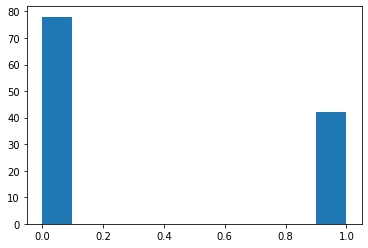

In [52]:
# Histograma
plt.hist(x);

In [53]:
# Soma das observações.
y = np.sum(x)
y

42

In [55]:
# Estimativa da proporção amostral
p_hat = x.mean()
p_hat

0.35

In [57]:
# Estiamtiva de desvio-padrão
desv = np.sqrt((p_hat*(1-p_hat))/n)
desv

0.04354116825871043

In [58]:
# Contrução do intervalo de confiança
cconf = .95
caudas    = 2
alpha     = (1 - cconf)/caudas
z_critico = stats.norm.ppf(1 - alpha)

In [59]:
# Intervalo de confiança
lim_inf = p_hat - (z_critico * desv)
print("Limite inferior =" , round(lim_inf, 4))

lim_sup = p_hat + (z_critico * desv)
print("Limite superior =" , round(lim_sup, 4)) 

Limite inferior = 0.2647
Limite superior = 0.4353


Aqui também podemos usar o método [`norm.interval`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html).

In [60]:
norm.interval(alpha = cconf, loc = p_hat, scale = desv)

(0.26466087836812896, 0.435339121631871)

### Exemplo usando o Statsmodels

> Intervalo de confinança para a [média com base na normal padrão](https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.zconfint.html#statsmodels.stats.weightstats.zconfint).

> Intervalo de confinança para a [média com base na t](https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats._tconfint_generic.html#statsmodels.stats.weightstats._tconfint_generic).

> Intervalo de confinança para [proporção](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportion_confint.html#statsmodels.stats.proportion.proportion_confint).

**EXEMPLO**

Considerando a situação do exemplo anterior (valores de *n* e *y*).

Calcule um intervalo de confianaça para essa proporção considerando um nível de confiança de 95%.

In [61]:
import statsmodels.stats.proportion as smp

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [63]:
inf, sup = smp.proportion_confint (y, n, alpha=0.05, method='normal')

print ('Limite inferior do IC :', inf)
print ('Limite superior do IC:', sup)

Limite inferior do IC : 0.2646608783681289
Limite superior do IC: 0.43533912163187105
